In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
import sklearn 
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.metrics import accuracy_score # type: ignore
from sklearn.metrics import classification_report # type: ignore
import re
import string

In [2]:
print("pandas",pd.__version__)
print("numpy",np.__version__)
print("seaborn",sns.__version__)
# print("matplotlib",plt.__version__)
# print("sklearn",sk.__version__)


pandas 2.2.2
numpy 1.26.4
seaborn 0.13.2


In [3]:
data_fake=pd.read_csv("Fake.csv")
data_true=pd.read_csv("True.csv")

In [4]:
data_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [5]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
#checking different subjects and their counts
data_fake["subject"].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

In [7]:
data_true["subject"].value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

In [8]:
#creating a class for whether fake or not(as till now we don't have a target)
data_fake['class']=0
data_true['class']=1


In [9]:
data_fake.shape,data_true.shape

((23481, 5), (21417, 5))

In [10]:
data_fake_manual_testing=data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i],axis=0,inplace=True)
data_true_manual_testing=data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis=0,inplace=True)

In [11]:
data_fake.shape,data_true.shape

((23471, 5), (21407, 5))

In [12]:
data_fake_manual_testing['class']=0
data_true_manual_testing['class']=1

C:\Users\Jyoti\AppData\Local\Temp\ipykernel_7664\1676563180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class']=0
C:\Users\Jyoti\AppData\Local\Temp\ipykernel_7664\1676563180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class']=1


In [13]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [14]:
data_merge=pd.concat([data_fake,data_true],axis=0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [15]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [16]:
data=data_merge.drop(['title','subject','date'],axis=1)

In [17]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [18]:
data=data.sample(frac=1)

In [19]:
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

In [20]:
data.columns

Index(['text', 'class'], dtype='object')

In [21]:
data.head()

,text,class
0,"MANILA/MARAWI CITY, Philippines (Reuters) - Ph...",1
1,WASHINGTON (Reuters) - President Barack Obama ...,1
2,WASHINGTON (Reuters) - U.S. President Donald T...,1
3,WASHINGTON (Reuters) - A powerful Senate commi...,1
4,Being sent to Russia for misbehavior may be ju...,0


In [22]:

def wordopt(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)  # Remove text within square brackets
    text = re.sub(r'\W', ' ', text)      # Replace non-word characters with a space
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>', '', text)   # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)       # Remove newlines
    text = re.sub(r'\w*\d\w*', '', text) # Remove alphanumeric words with digits
    return text



In [23]:
data['text']=data['text'].apply(wordopt)

In [24]:
x=data['text']
y=data['class']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer # type: ignore
vectorization=TfidfVectorizer()
xv_train=vectorization.fit_transform(x_train)
xv_test=vectorization.transform(x_test)


In [27]:
from sklearn.linear_model import LogisticRegression # type: ignore
LR=LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [28]:
prediction_lr=LR.predict(xv_test)
y_pred_proba = LR.predict_proba(xv_test)[:, 1]
LR.score(xv_test,y_test)

0.9876336898395722

In [29]:
print(classification_report(y_test,prediction_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4687
           1       0.98      0.99      0.99      4289

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



In [30]:
from sklearn.tree import DecisionTreeClassifier # type: ignore
DT=DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [31]:
prediction_dt=DT.predict(xv_test)

In [32]:
DT.score(xv_test,y_test)

0.9958778966131907

In [33]:
print(classification_report(y_test,prediction_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4687
           1       1.00      1.00      1.00      4289

    accuracy                           1.00      8976
   macro avg       1.00      1.00      1.00      8976
weighted avg       1.00      1.00      1.00      8976



In [34]:
from sklearn.ensemble import GradientBoostingClassifier # type: ignore
GB=GradientBoostingClassifier(random_state=0)
GB.fit(xv_train,y_train)

GradientBoostingClassifier(random_state=0)

In [35]:
predict_gb=GB.predict(xv_test)

In [36]:
GB.score(xv_test,y_test)

0.9967691622103387

In [37]:
print(classification_report(y_test,predict_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4687
           1       0.99      1.00      1.00      4289

    accuracy                           1.00      8976
   macro avg       1.00      1.00      1.00      8976
weighted avg       1.00      1.00      1.00      8976



In [38]:
from sklearn.ensemble import RandomForestClassifier # type: ignore
RF=RandomForestClassifier(random_state=0)
RF.fit(xv_train,y_train)


RandomForestClassifier(random_state=0)

In [39]:
predict_rf=RF.predict(xv_test)

In [40]:
RF.score(xv_test,y_test)

0.990975935828877

In [41]:
print(classification_report(y_test,predict_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4687
           1       0.99      0.99      0.99      4289

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



In [42]:
from sklearn.svm import LinearSVC # type: ignore
# # Create an SVM model
# svm_model = SVC(kernel='linear', C=1.0)

# # Train the model
# svm_model.fit(xv_train,y_train)

# # Make predictions on the test set
# y_pred = svm_model.predict(xv_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


svm_model = LinearSVC(C=1.0)
svm_model.fit(xv_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(xv_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

c:\Users\Jyoti\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.9956550802139037
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4687
           1       1.00      1.00      1.00      4289

    accuracy                           1.00      8976
   macro avg       1.00      1.00      1.00      8976
weighted avg       1.00      1.00      1.00      8976



In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4687
           1       1.00      1.00      1.00      4289

    accuracy                           1.00      8976
   macro avg       1.00      1.00      1.00      8976
weighted avg       1.00      1.00      1.00      8976



In [44]:
def output_label(n):
    if n==0:
        return "Fake news"
    elif n==1:
        return "Not A Fake News"
def manual_testing(news):
    testing_news={"text":[news]}
    new_def_test=pd.DataFrame(testing_news)
    new_def_test["text"]=new_def_test["text"].apply(wordopt)
    new_x_test=new_def_test["text"]
    new_xv_test=vectorization.transform(new_x_test)
    pred_LR=LR.predict(new_xv_test)
    pred_DT=DT.predict(new_xv_test)
    pred_GB=GB.predict(new_xv_test)
    pred_RF=RF.predict(new_xv_test)
    y_pred=svm_model.predict(new_xv_test)
    return print("\n\nLR prediction: {} \nDT prediction: {} \nGBC prediction :{} \nRFC prediction: {}".format(output_label(prediction_lr[0]),output_label(prediction_dt[0]),output_label(predict_gb[0]),output_label(predict_rf[0])))

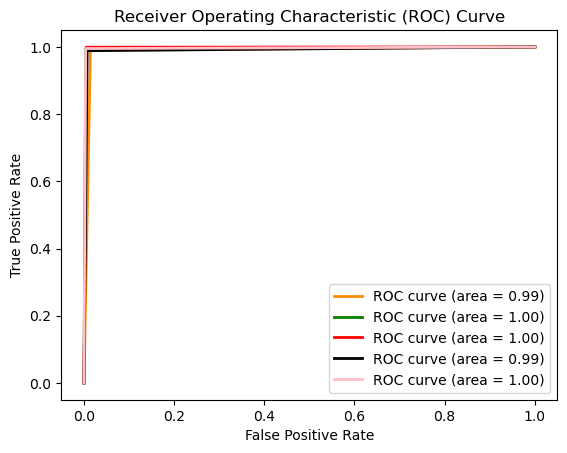

In [45]:
from sklearn.metrics import roc_curve, auc # type: ignore
import matplotlib.pyplot as plt # type: ignore

# Assuming y_test contains the true labels and y_pred contains the predicted probabilities
fpr1, tpr1, thresholds = roc_curve(y_test,prediction_lr)
fpr2, tpr2, thresholds = roc_curve(y_test,prediction_dt)
fpr3, tpr3, thresholds = roc_curve(y_test,predict_gb)
fpr4, tpr4, thresholds = roc_curve(y_test,predict_rf)
fpr5, tpr5, thresholds = roc_curve(y_test,y_pred)


roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
roc_auc4 = auc(fpr4, tpr4)
roc_auc5 = auc(fpr5, tpr5)


# Plot ROC curve
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, color='black', lw=2, label='ROC curve (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, color='pink', lw=2, label='ROC curve (area = %0.2f)' % roc_auc5)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [46]:
from sklearn.metrics import roc_auc_score # type: ignore


auc_value_LogisticRegression = roc_auc_score(y_test, y_pred_proba)

print("AUC value for LogisticRegression:", auc_value_LogisticRegression)





AUC value for LogisticRegression: 0.9979406585525026


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix # type: ignore

mcc = matthews_corrcoef(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Matthews Correlation Coefficient:", mcc)
print("Confusion Matrix:\n", cm)


Matthews Correlation Coefficient: 0.9912930056492718
Confusion Matrix:
 [[4669   18]
 [  21 4268]]


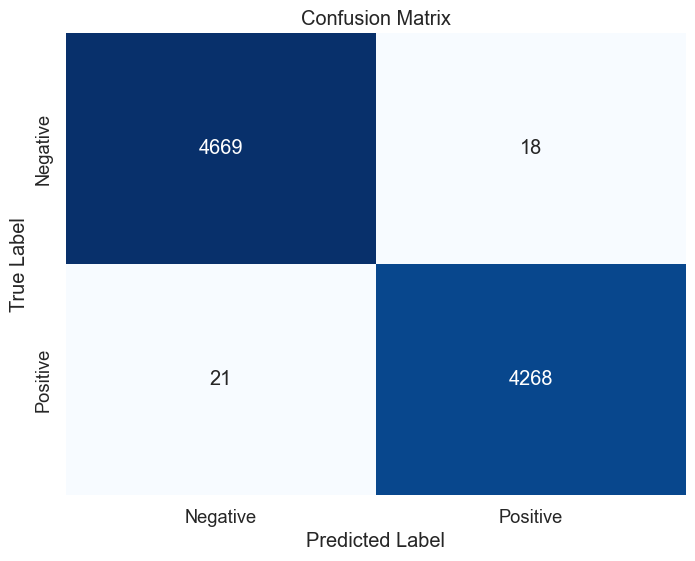

In [48]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from sklearn.metrics import confusion_matrix # type: ignore

# Assuming y_true and y_pred are your true labels and predicted labels respectively

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
classes = ['Negative', 'Positive']  # Modify these labels according to your class names

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for better visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [49]:
# news=str(input())
# manual_testing(news)

In [50]:
import joblib

# Save models
joblib.dump(LR, 'logistic_regression_model.pkl')
joblib.dump(DT, 'decision_tree_model.pkl')
joblib.dump(GB, 'gradient_boosting_model.pkl')
joblib.dump(RF, 'random_forest_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(vectorization, 'vectorizer.pkl')







['vectorizer.pkl']